In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
loss_s=np.zeros(50)
loss_i=np.zeros(50)

In [0]:
dtype = torch.float
device = torch.device("cpu")

In [0]:
N,D_in,H,D_O=64,1000,100,10

In [0]:
#x=torch.randn(N,D_in,device=device,d_type=dtype)
#x = torch.randn(N, D_in, device=device, dtype=dtype)
x=torch.randn(N,D_in,device=device,dtype=dtype)
y=torch.randn(N,D_O,device=device,dtype=dtype)
w1=torch.randn(D_in,H,device=device,dtype=dtype,requires_grad=True)
w2=torch.randn(H,D_O,device=device,dtype=dtype,requires_grad=True)

In [102]:
learning_rate=1e-6
w1

tensor([[ 0.2150,  1.1929,  0.3934,  ..., -0.6764,  0.2005, -0.2530],
        [ 0.4429, -1.0158, -0.1605,  ...,  0.0497, -0.8016, -1.2877],
        [ 0.3408, -1.8316, -1.2660,  ...,  0.8068,  1.0758,  0.2069],
        ...,
        [-0.9915, -0.2041, -0.6968,  ...,  0.9961,  1.6110, -0.1959],
        [ 1.5780,  0.3232, -1.7097,  ..., -1.9191,  2.5495,  0.5766],
        [ 1.1973, -0.0849,  1.0484,  ..., -0.7278, -2.0264, -1.2831]],
       requires_grad=True)

In [103]:
for i in range(50):
  y_pred=x.mm(w1).clamp(min=0).mm(w2)
  loss=(y_pred-y).pow(2).sum()
  print(" {} : {}".format(i,loss))
  loss_s[i]=loss
  loss_i[i]=i
  loss.backward()
  with torch.no_grad():
        w1.grad=w1.grad.clamp(max=1000)
        w2.grad=w2.grad.clamp(max=1000)
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

 0 : 25781444.0
 1 : 20971960.0
 2 : 18209756.0
 3 : 15891067.0
 4 : 13928339.0
 5 : 12256360.0
 6 : 10815402.0
 7 : 9569097.0
 8 : 8489371.0
 9 : 7550770.0
 10 : 6733311.0
 11 : 6017101.0
 12 : 5388000.0
 13 : 4832162.0
 14 : 4340548.0
 15 : 3903201.5
 16 : 3514302.5
 17 : 3167842.75
 18 : 2858308.5
 19 : 2581393.25
 20 : 2332820.75
 21 : 2110174.75
 22 : 1909939.0
 23 : 1729836.625
 24 : 1567691.125
 25 : 1421633.375
 26 : 1290058.75
 27 : 1171356.0
 28 : 1063988.25
 29 : 966840.25
 30 : 878907.8125
 31 : 799219.875
 32 : 726975.875
 33 : 661521.875
 34 : 602280.125
 35 : 548543.375
 36 : 499762.84375
 37 : 455426.625
 38 : 415292.625
 39 : 378825.59375
 40 : 345659.28125
 41 : 315528.28125
 42 : 288143.8125
 43 : 263253.28125
 44 : 240636.53125
 45 : 220077.421875
 46 : 201376.515625
 47 : 184384.140625
 48 : 168963.59375
 49 : 154914.78125


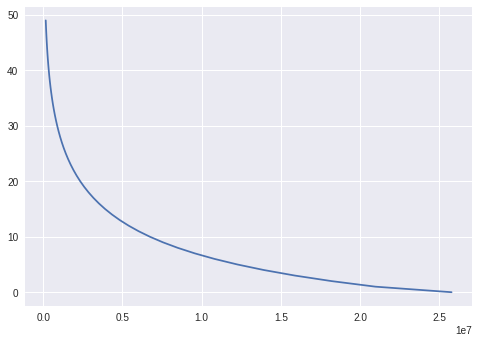

In [104]:
plt.plot(loss_s,loss_i)